In [1]:
import numpy as np
from matplotlib import pyplot as plt

![title](whiteboard/transmission.png)

The probability of catching a disease from an individual is the probability that they have it $P_i$, multiplied by the chance that it would be transmitted to you given that they have it $P_t$.

$$ P_{single} = P_i P_t $$

$P_t$ is the  conductance of the connection between you and the other person. The conductance depends on the environment, and the health and behavior of both parties. This "conductance" will vary a great deal but it will be _on average_ higher for more infectious diseases.

Assuming a uniform $P_t$, the chance of _not_ acquiring the disease from one person is

$$ 1-P_{single} $$

The chance of not catching it after $n$ "trial" of $n$ people is

$$ (1-P_{single})^n $$

And the chance of not-not catching $P_{i+1}$- that is, catching it from anyone - is the negation of that.

$$ P_{i+1} = 1 - (1-P_{single})^n $$

To put this in context - the average daily cases of COVID in King County, Washington on November 16, 2020 is 23 in 100k. Assuming half of infections are represented as cases, and infections are transmissible for 10 days, that implies that

In [3]:
P_i = 23*2*10 / 100000
print( f"P_i = {P_i}")

P_i = 0.0046


Assuming a conductance $P_t$ of 0.75 of all people in your pod or household, the chance of catching COVID from a pod of size $n$ is:

In [4]:
P_t = 0.75

def make_P_function(P_i, P_t):
    return lambda n: (1-(1-P_i*P_t)**n)

Text(0.5, 1.0, 'COVID risk by pod size, $P_i=0.0046$')

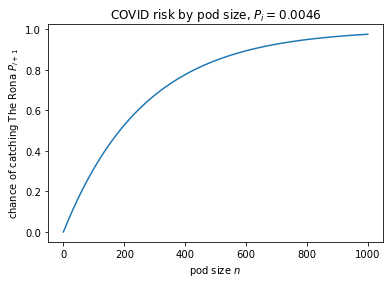

In [9]:
n = np.arange(0,1000)

P_next = make_P_function(P_i = 0.005, P_t = 0.75)

plt.plot(n, P_next(n))
plt.xlabel("pod size $n$")
plt.ylabel("chance of catching The Rona $P_{i+1}$")
plt.title(f"COVID risk by pod size, $P_i={P_i}$")

The thing is, the probability that _every person you're connected with_ has an infection follows the _same_ rule.

If a person is connected to five people, each with a _background probability_ of 0.005 (half a percent), and a virus conductance of 0.75, then their probability of contracting the virus is:

In [10]:
P_0 = 0.005
P_1 = make_P_function(P_i = P_0, P_t = 0.75)(n=5)
print( f"About {P_1*100:0.1f}%" )

About 1.9%


![title](whiteboard/pod.png)

If you're in a pod of five of _those people_, then your risk is:

In [11]:
P_2 = make_P_function(P_i = P_1, P_t = 0.75)(n=5)
print( f"About {P_2*100:0.1f}%" )

About 6.8%


![title](whiteboard/metapod.png)

What if we go _three_ generations?

In [12]:
P_3 = make_P_function(P_i = P_2, P_t = 0.75)(n=5)
print( f"About {P_3*100:0.1f}%" )

About 23.0%


About a quarter risk of infection.

Six generations outward? This accounts for connection with $5^6$ people, at an attenuation of 75% each generation.

In [14]:
def find_metapod_risk(P_0, P_t, n, n_generations):
    P_i = P_0
    for i in range(n_generations):
        P_i = make_P_function(P_i = P_i, P_t = P_t)(n)
        
    return P_i

In [15]:
find_metapod_risk(P_0=0.005, P_t=0.75, n=5, n_generations=6)

0.9981259056034352

99.8% probability of infection. What about 100 generations?

In [16]:
find_metapod_risk(P_0=0.005, P_t=0.75, n=5, n_generations=100)

0.9990088318329132

**What?** With 100 generations, each expanding by a factor of 5, you would be connected to:

In [18]:
5**100

7888609052210118054117285652827862296732064351090230047702789306640625

people. Which is more people than will ever exist. 

And yet, even then, you wouldn't be guaranteed to catch COVID.

Think of it this way - if every person in your pod is _guaranteed_ to have COVID, but the virus conductance is only 0.75, then your chance of getting it is

$$ P = 1 - (1-P_{it})^n $$

$$ P = 1 - (1-(1 \cdot 0.75))^5 $$

In [19]:
1 - (1-.75)**5

0.9990234375

Which is pretty close to the convergence probability.

## Let's try some other parameters

In [31]:
def make_report(P_0, P_t, n):
    P_conv = find_metapod_risk(P_0=P_0, P_t=P_t, n=n, n_generations=1000)

    print(f"Population incidence: {P_0*100}%")
    print(f"Viral conductance: {P_t*100}%")
    print(f"Average pod size: {n}")

    print(f"Convergence probability of infection: {100*P_conv:0.2f}%")

In [32]:
P_0=0.005
P_t=0.5
n=5

make_report(P_0, P_t, n)

Population incidence: 0.5%
Viral conductance: 50.0%
Average pod size: 5
Convergence probability of infection: 96.24%


In [33]:
P_0=0.005
P_t=0.3
n=5

make_report(P_0, P_t, n)

Population incidence: 0.5%
Viral conductance: 30.0%
Average pod size: 5
Convergence probability of infection: 68.11%


In [34]:
P_0=0.005
P_t=0.2
n=5

make_report(P_0, P_t, n)

Population incidence: 0.5%
Viral conductance: 20.0%
Average pod size: 5
Convergence probability of infection: 0.17%


Not the _sudden rise_ in convergence probability between viral conductances of 20% and 30%, from rare to probable.

In [36]:
P_t = np.linspace(0,1,200)
P = [find_metapod_risk(P_0=0.005, P_t=P_t_i, n=5, n_generations=1000) for P_t_i in P_t]

Text(0, 0.5, 'Convergence infection probability')

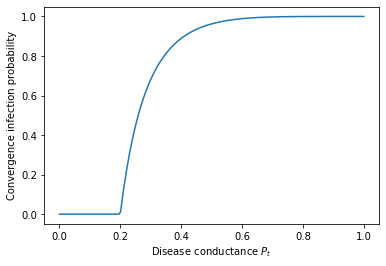

In [39]:
plt.plot(P_t, P)
plt.xlabel("Disease conductance $P_t$")
plt.ylabel("Convergence infection probability")

The probabiliy between generations will converge when it doesn't change. In other words: 

$$ P_{conv} = 1 - (1-P_t \cdot P_{conv})^n $$

aaaaand if you can solve that, that's neat, because I can't.

But we can figure out the inflection point _by inspection_. If $P_t < \frac{1}{n}$, then the probability of infection will drop with each generation, converging on zero.

## Conclusion

A few things to note:
    
* The convergence probability **does not depend on the background disease incidence**. Leaky pods and an arbitrarily high disease conductance $P_t$ will have an infection probability approaching 1.
* Even for arbitrarily large pods, forming networks spanning every human, the **infection probability approaches 0** for disease conductance values inversely proportional to average pod size.
* Even for disease conductance values above that critical threshold, the convergance value is never 1; it can be < 0.5 for some values above the critical threshold.